We are making a **student success predictor**

In [4]:
import pandas as pd
df = pd.read_csv('student_success_dataset.csv')

print("sample rows")
print(df.head())

print("Dataset Shape")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("dataset info")
print(df.info())

print("summary statistics")
print(df.describe(include='all'))

print("missing values")
print(df.isnull().sum())


sample rows
   StudyHours  Attendance  PastScore Internet  SleepHours Passed
0           2          60         40      Yes           5     No
1           5          80         60       No           6    Yes
2           8          90         75      Yes           8    Yes
3           3          70         70      Yes           7    Yes
4           7          85         50       No           4     No
Dataset Shape
Rows: 23, Columns: 6
dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudyHours  23 non-null     int64 
 1   Attendance  23 non-null     int64 
 2   PastScore   23 non-null     int64 
 3   Internet    23 non-null     object
 4   SleepHours  23 non-null     int64 
 5   Passed      23 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.2+ KB
None
summary statistics
        StudyHours  Attendance  PastScore Internet  Sl

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv('student_success_dataset.csv')
print("missing value in each column")
print(df.isnull().sum())

le=LabelEncoder()
df['Internet']=le.fit_transform(df['Internet'])
df['Passed']=le.fit_transform(df['Passed'])

print("after encoding categorical variables")
print(df.head())

print("Data-types after cleaning")
print(df.dtypes)

missing value in each column
StudyHours    0
Attendance    0
PastScore     0
Internet      0
SleepHours    0
Passed        0
dtype: int64
after encoding categorical variables
   StudyHours  Attendance  PastScore  Internet  SleepHours  Passed
0           2          60         40         1           5       0
1           5          80         60         0           6       1
2           8          90         75         1           8       1
3           3          70         70         1           7       1
4           7          85         50         0           4       0
Data-types after cleaning
StudyHours    int64
Attendance    int64
PastScore     int64
Internet      int64
SleepHours    int64
Passed        int64
dtype: object


Classification report
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



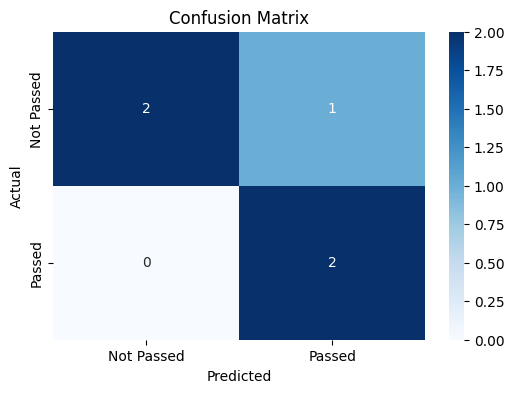

____Predict Your Result____
The student is predicted to: Not Passed


C:\Users\more6\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('student_success_dataset.csv')

# Encode categorical variables
le = LabelEncoder()
df['Internet'] = le.fit_transform(df['Internet'])
df['Passed'] = le.fit_transform(df['Passed'])

# Features and target
features = ['StudyHours', 'Attendance', 'PastScore', 'Internet', 'SleepHours']
target = 'Passed'

# Scale features
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

X = df_scaled[features]
y = df_scaled[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Classification report")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Passed', 'Passed'], yticklabels=['Not Passed', 'Passed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("____Predict Your Result____")
try:
    study_hours = float(input("Enter Study Hours: "))
    attendance = float(input("Enter Attendance Percentage: "))
    past_score = float(input("Enter Past Score: "))
    internet = input("Has Internet? (yes/no): ").strip().lower()
    sleep_hours = float(input("Enter Sleep Hours: "))

    # Encode Internet input
    internet_encoded = 1 if internet in ['yes', 'y', '1', 'true'] else 0

    user_input_df = pd.DataFrame({
        'StudyHours': [study_hours],
        'Attendance': [attendance],
        'PastScore': [past_score],
        'Internet': [internet_encoded],
        'SleepHours': [sleep_hours]
    })

    user_input_scaled = scaler.transform(user_input_df)
    prediction = model.predict(user_input_scaled)

    result = "Passed" if prediction[0] == 1 else "Not Passed"
    print(f"The student is predicted to: {result}")

except ValueError:
    print("Invalid input. Please enter numeric values.")